_Note: To execute code in this repository, you will need to install the `niwaves` package from GitHub:_

https://github.com/rciric/niwaves

# Naive lag analysis

We begin with a naive analysis of lagged connectivity, as defined by Mitra and colleagues. For this initial analysis, we will use a single subject's preprocessed data with three tasks from the Philadelphia Neurodevelopmental Cohort (PNC).

* Repetition time/sampling time is 3 s.
* Data have been processed using a 36-parameter denoising model.
* Mean time series have been extracted from each node of the 400-region version of the Schaefer parcellation.
* Data comprise three tasks that have been concatenated temporally: rest, fractal n-back, and emotional identification (IDEMO).
* To run lag analysis for each task in turn, we use the `lag_analysis` function in `niwaves`, providing as an argument a temporal mask indicating whether each time point belongs to the task in question.

In [1]:
import niwaves
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Begin by loading the dataset, all masks, and the 7-network community partition.

In [2]:
ts_bold = pd.read_table('data/PNC/sub-001_concatenatedBOLDts.1D', header=None, sep=' ')
mask_rest = pd.read_table('data/PNC/idx_rest.1D', header=None)
mask_nback = pd.read_table('data/PNC/idx_nback.1D', header=None)
mask_idemo = pd.read_table('data/PNC/idx_idemo.1D', header=None)
community = pd.read_table('data/PNC/schaefer400x7CommunityAffiliation.1D', header=None)

Next, execute lag analysis.

In [3]:
# Rest
lags_rest, peaks_rest = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                             tmask=mask_rest.values,
                                             sample_time=3,
                                             min_block=15,
                                             lagmax=2)
# N-back
lags_nback, peaks_nback = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                               tmask=mask_nback.values,
                                               sample_time=3,
                                               min_block=15,
                                               lagmax=2)
# IDEMO
lags_idemo, peaks_idemo = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                               tmask=mask_idemo.values,
                                               sample_time=3,
                                               min_block=15,
                                               lagmax=2)

The below code reorganises the lag matrices according to community structure and mean latency within each community. The relatively lower overall latencies along the diagonal correspond to within-community edges.

The distributions of lag values are also plotted. Because lag matrices are antisymmetric, these distributions will of necessity be symmetric around the origin. Notably, these distributions are fundamentally multimodal, with a separate distribution mode centred at each integral TR multiple (in this case, -3 s, 0 s, and +3 s).

/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


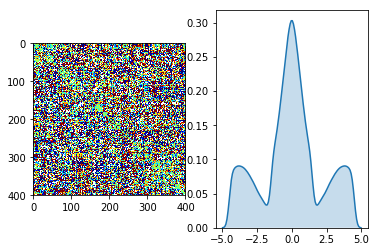

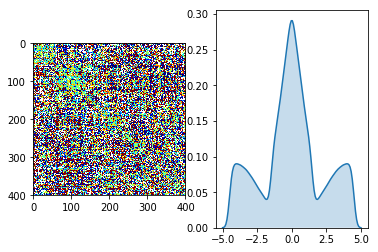

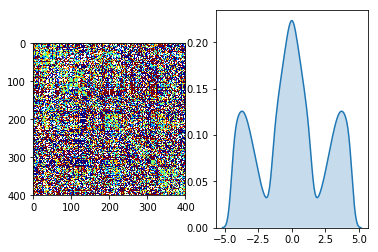

In [4]:
niwaves.lag_sort(lags_rest, community=community)
plt.figure()
niwaves.lag_sort(lags_nback, community=community)
plt.figure()
niwaves.lag_sort(lags_idemo, community=community)

Those are some noisy matrices! With a few hundred frames of data at best, the lag matrices don't appear to have much meaningful structure. Although within-community latencies (near the diagonal) generally appear to be shorter in duration than between-community latencies, it's hard to discern any further structure.

One result, however, looks interesting and immediately stands out -- the IDEMO matrix (bottom) has, on the whole, more lags clustered around the peaks at -3 s and +3 s than do the rest (top) or n-back (middle) matrices. Could this be attributable to task-related differences?

In this case, the answer is almost certainly not. Instead, these differences are more likely attributable to sampling variability. Let's take a look at the temporal masks that we used for each task.

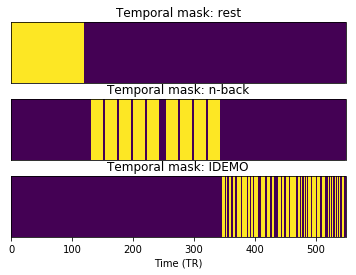

In [5]:
plt.subplot(3,1,1)
plt.imshow(mask_rest.values.T, aspect=100)
plt.title('Temporal mask: rest')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.subplot(3,1,2)
plt.imshow(mask_nback.values.T, aspect=100)
plt.title('Temporal mask: n-back')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.subplot(3,1,3)
plt.imshow(mask_idemo.values.T, aspect=100)
plt.title('Temporal mask: IDEMO')
plt.tick_params(axis='y', left=False, labelleft=False)
plt.xlabel('Time (TR)');

Although a greater overall number of time points is sampled for the n-back and IDEMO cases than for the rest case, these temporal masks censor intervening rest epochs from each task. The n-back task, which has a block design, isn't as affected as the event-related IDEMO task. Because the IDEMO task is cut up into event epochs that are shorter than the minimum duration required to perform lagged cross-correlation, many IDEMO epochs are excluded from the analysis altogether, resulting in a substantially lower amount of data.

Next, let's load in an alternative set of masks that doesn't censor the intervening rest epochs from each task.

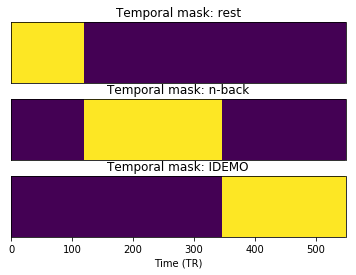

In [6]:
mask_nback_all = pd.read_table('data/PNC/idx_nback_all.1D', header=None)
mask_idemo_all = pd.read_table('data/PNC/idx_idemo_all.1D', header=None)

plt.subplot(3,1,1)
plt.imshow(mask_rest.values.T, aspect=100)
plt.title('Temporal mask: rest')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.subplot(3,1,2)
plt.imshow(mask_nback_all.values.T, aspect=100)
plt.title('Temporal mask: n-back')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.subplot(3,1,3)
plt.imshow(mask_idemo_all.values.T, aspect=100)
plt.title('Temporal mask: IDEMO')
plt.tick_params(axis='y', left=False, labelleft=False)
plt.xlabel('Time (TR)');

...and, repeating the analysis:

/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


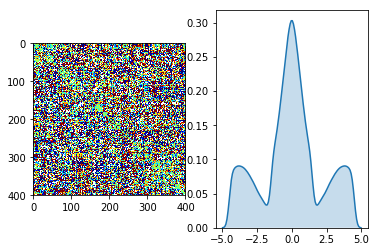

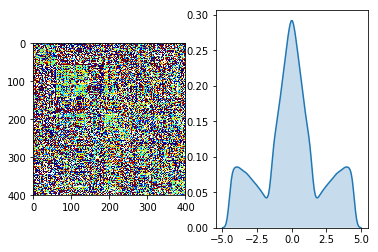

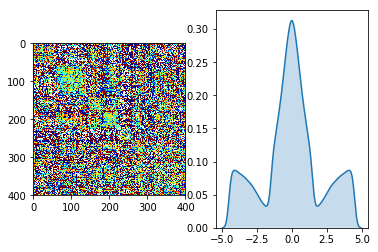

In [7]:
# Rest
lags_rest, peaks_rest = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                             tmask=mask_rest.values,
                                             sample_time=3,
                                             min_block=15,
                                             lagmax=2)
# N-back
lags_nback, peaks_nback = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                               tmask=mask_nback_all.values,
                                               sample_time=3,
                                               min_block=15,
                                               lagmax=2)
# IDEMO
lags_idemo, peaks_idemo = niwaves.lag_analysis(timeseries1=ts_bold.values,
                                               tmask=mask_idemo_all.values,
                                               sample_time=3,
                                               min_block=15,
                                               lagmax=2)

niwaves.lag_sort(lags_rest, community=community)
plt.figure()
niwaves.lag_sort(lags_nback, community=community)
plt.figure()
niwaves.lag_sort(lags_idemo, community=community)

As hypothesised, the most prominent difference in distributions vanishes after changing to a mask with better coverage. (Notably, other differences in the lag matrix structure appear; however, (i) there are additional confounds that we have yet to consider and (ii) this is a toy example with a sample size of 1 poorly sampled subject.) This highlights a potential concern with the naive lag analysis. In particular, the analysis appears to be sensitive to data sampling.

Data sampling isn't the only potential concern with lag analysis. Another potential (major) pitfall is the regional (and inter-individual) variability in the shape of the haemodynamic response. This concern is substantial enough that we'll dedicate a separate notebook to it.

For now, let's close off our naive investigation and initial investigation of sampling error by ensuring that another type of sampling error -- due to subdivision of the time series into sub-epochs -- does not inordinately impact lag estimates. Typically, lag is computed 

Sure enough, recent work from Anish Mitra, Marcus Raichle, and colleagues is concordant with our preliminary findings regarding sampling error, including the reports of lags clustered around integer multiplesof the repetition time.

In [8]:
def ts_break(ts, interval):
    """Break up a time series into subsamples of a specified
    duration. Return the temporal mask that will restore the
    original time series.
    """
    num_intervals = ts.shape[0] // interval
    tmask = np.ones(ts.shape[0] + num_intervals, dtype='bool')
    ts_broken = np.zeros([ts.shape[0] + num_intervals, ts.shape[1]])
    for i in range(num_intervals):
        ts_broken[i*(interval+1):(i+1)*(interval+1)-1,:] = ts[i*(interval):(i+1)*interval,:]
        tmask[(i+1)*(interval+1)-1] = False
    ts_broken[(i+1)*(interval+1):,:] = ts[(i+1)*(interval):,:]
    return ts_broken, tmask

/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vagrant/miniconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


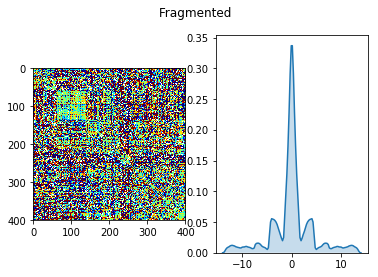

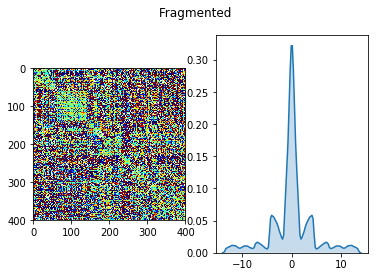

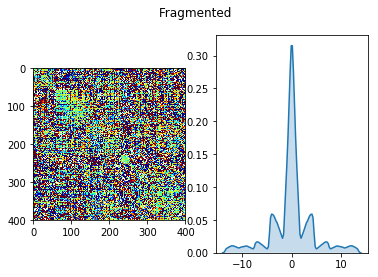

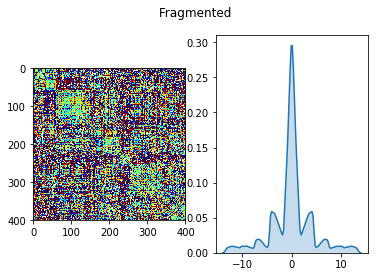

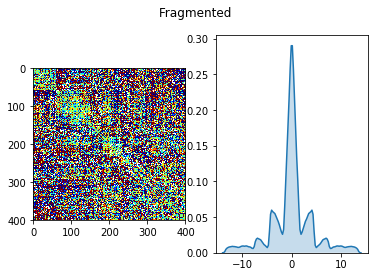

In [9]:
for i in [31, 60, 120, 250, 549]:
    ts_broken, tmask = ts_break(ts_bold.values, i)
    lags, peaks = niwaves.lag_analysis(timeseries1=ts_broken,
                                       tmask=tmask,
                                       sample_time=3)
    plt.figure()
    niwaves.lag_sort(lags, community=community)
    plt.suptitle('Fragmented')